# Chapter 9: Linear regression 

```{epigraph}
*"Do the difficult things while they are easy and do the great things while they are small. A journey of a thousand miles must begin with a single step."*

-- Lao Tzu
```

```{seealso}
- [Linear regression](https://en.wikipedia.org/wiki/Linear_regression)
```

## Simple linear regression

Simple linear regression is a linear model with a single explanatory variable $x$. The model assumes a linear relationship between the response variable $y$ and the explanatory variable $x$, i.e., 

$y_{i}=\beta_0+\beta_1 x_{i}+\epsilon_{i}$

$x$ : the explanatary variable. $X$ is fixed.

$y$: the response variable.

$\epsilon$ : the error term. The model assumes that $\epsilon_{i}{ }^{\prime} s$ are iid random variables with the normal $\left(0, \sigma^{2}\right)$ density.

In [1]:
data(trees)
head(trees)

,Girth,Height,Volume
,<dbl>,<dbl>,<dbl>
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8
6,10.8,83,19.7


The probability distribution of $y_{i}$ is $\operatorname{Normal}\left(\beta_0+\beta_1 X_{i}, \sigma^{2}\right)$. The expectation of $y$ is a linear function of $x$, i.e., $E(y)$ and $x$ has a linear relationship,

$$E(y) = \beta_0+\beta_1x$$(1)

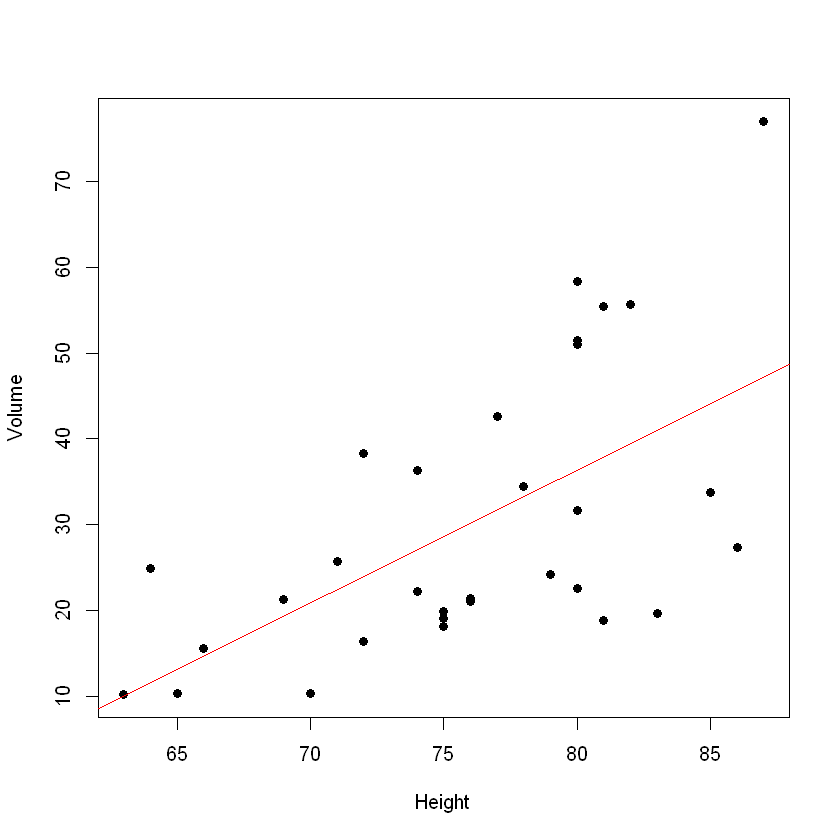

In [2]:
plot(Volume ~ Height, data = trees, pch=16)
abline(lm(Volume ~ Height , data=trees), col='red')

The intercept $\beta_0$ and slope $\beta_1$ are two parameters to estimate from data. Given $\beta_0$ and $\beta_1$, the equation (1) can be used to predict the value of $y$ for a new value of $x$, i.e., 

$$y_{new} = \beta_0+\beta_1x_{new}$$(2)


### 1. Least square estimates

We estimate $\beta_0$ and $\beta_1$ by minimizing the sum of squared errors with respect to $\beta_0$ and $\beta_1$,

$$
\sum_{i=1}^{n}\left(y_{i}-\left(\beta_0+\beta_1 x_{i}\right)\right)^{2}
$$

Taking the derivative of the sum of squared errors with respect to $\beta_0$ and $\beta_1$, we have

$$
\frac{\partial \sum_{i=1}^{n}\left(y_{i}-\left(\beta_0+\beta_1 x_{i}\right)\right)^{2}}{\partial \beta_0}=0
$$

and

$$
\frac{\partial \sum_{i=1}^{n}\left(y_{i}-\left(\beta_0+\beta_1 x_{i}\right)\right)^{2}}{\partial \beta_1}=0
$$

Thus,

$$
\begin{equation}
\begin{cases}
\hat{\beta_0}=\bar{y}-\beta_1 \bar{x}\\
\hat{\beta_1}=\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sum\left(x_{i}-\bar{x}\right)^{2}}\\
\widehat{\sigma^{2}}=\frac{\sum\left(y_{i}-\hat{y}\right)^{2}}{n-2}
\end{cases}
\end{equation}
$$

In [3]:
lm(Volume ~ Height , data=trees)

x = trees$Height
y = trees$Volume

beta1 = sum((x-mean(x))*(y-mean(y)))/sum((x-mean(x))^2)
beta0 = mean(y) - beta1*mean(x)

beta0
beta1


Call:
lm(formula = Volume ~ Height, data = trees)

Coefficients:
(Intercept)       Height  
    -87.124        1.543  


[1] -87.12361

[1] 1.54335

### 2. Maximum likelihood estimates 

We first find the likelihood function

$$
f\left(y_{1}, y_{2}, \ldots, y_{n}\right)=\prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{-\frac{\sum\left(y_{i}-\left(\beta_0+\beta_1 x_{i}\right)\right)^{2}}{2 \sigma^{2}}}
$$

Next, we find the log-likelihood

$$
n \log \left(\frac{1}{\sqrt{2 \pi \sigma^{2}}}\right)-\frac{\sum\left(y_{i}-\left(\beta_0+\beta_1 x_{i}\right)\right)^{2}}{2 \sigma^{2}}
$$

The log-likelihood is maximized if $\sum_{i=1}^{n}\left(y_{i}-\left(\beta_0+\beta_1 x_{i}\right)\right)^{2}$ is minimized. Thus, the maximum likelihood estimates are identical with the least square estimates of $\beta_0$ and $\beta_1$.

### 3. Testing the linear relationship
```{important}
If $\beta_1=0$, we say that $Y$ and $X$ do not have the linear relationship

If $\beta_1>0$, we say that $\mathrm{Y}$ and $\mathrm{X}$ are positively correlated

If $\beta_1<0$, we say that $\mathrm{Y}$ and $\mathrm{X}$ are negatively correlated 
```

The likelihood ratio test (LRT) can be used to test if $Y$ and $X$ have a linear relationship.

$\mathrm{H}_{0}: \beta_1=0$ and $\mathrm{H}_{1}: \beta_1 \neq 0$

The test statistic is $t=2 \log \left(l_{1}\right)-2 \log \left(l_{0}\right)$, where $\log \left(l_{0}\right)$ is the loglikelihood score of the null model

$$\log \left(l_{0}\right)=n \log \left(\frac{1}{\sqrt{2 \pi \sigma^{2}}}\right)-\frac{\sum\left(y_{i}-\beta_0\right)^{2}}{2 \sigma^{2}}=n \log \left(\frac{1}{\sqrt{2 \pi \hat{\sigma}^{2}}}\right)-\frac{\sum\left(y_{i}-\hat{\beta_0}\right)^{2}}{2 \hat{\sigma}^{2}}$$

$\log \left(l_{1}\right)$ is the loglikelihood score of the alternative model, i.e.,

$$
\begin{equation}
\begin{split}
\log \left(l_{1}\right) &=n \log \left(\frac{1}{\sqrt{2 \pi \sigma^{2}}}\right)-\frac{\sum\left(y_{i}-\left(\beta_0+\beta_1 x_{i}\right)\right)^{2}}{2 \sigma^{2}} \\
&=n \log \left(\frac{1}{\sqrt{2 \pi \hat{\sigma}^{2}}}\right)-\frac{\sum\left(y_{i}-\left(\hat{\beta_0}+\hat{\beta_1} x_{i}\right)\right)^{2}}{2 \hat{\sigma}^{2}}
\end{split}
\end{equation}
$$


$\mathrm{H}_{0}$ has one free parameter $\beta_0$, while $\mathrm{H}_{1}$ has two free parameters $\beta_0$ and $\beta_1$. Thus, the null distribution of the test statistic $t$ is the chi-square distribution with 1 degree of freedom.

Rejection region: we reject the null if $t>a$ where $a$ is the 95% quantile of the chi-square distribution with 1 degree of freedom.

In [4]:
result = lm(Volume ~ Height, data=trees)
summary(result)


Call:
lm(formula = Volume ~ Height, data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.274  -9.894  -2.894  12.068  29.852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.1236    29.2731  -2.976 0.005835 ** 
Height        1.5433     0.3839   4.021 0.000378 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.4 on 29 degrees of freedom
Multiple R-squared:  0.3579,	Adjusted R-squared:  0.3358 
F-statistic: 16.16 on 1 and 29 DF,  p-value: 0.0003784


## Multiple linear regression

$y_{i}=\beta_{0}+\beta_{1} x_{1 i}+\beta_{2} x_{2 i}+\cdots+\beta_{p} x_{p i}+\varepsilon_{i}$

$x_{i}$ : explanatary variables. We assume $X_{i}$ is fixed.

$y$ : the response variable. random variable

$\epsilon$ : the error term. The model assumes that $\epsilon_{i}^{\prime} s$ are independent and have the same probability distribution normal $\left(0, \sigma^{2}\right)$.

The probability distribution of $y_i$ is normal with mean $\left(\beta_{0}+\beta_{1} X_{1 i}+\beta_{2} X_{2 i}+\cdots+\right.$ $\left.\beta_{p} X_{p i}\right)$ and the variance of $\mathrm{Y}_{\mathrm{i}}$ is $\sigma^{2}$, in which $\left(\beta_{0}, \beta_{1}, \ldots, \beta_{p}\right)$ and $\sigma^{2}$ are parameters to estimate.

The matrix representation of multiple linear regression with $p$ predictors $\left(X_{1}, \ldots, X_{p}\right)$ is

$$
Y=X \beta+\epsilon
$$

where $\mathrm{Y}$ is a vector of size $n$, $\mathrm{X}$ is a $n \times(p+1)$ matrix, and $\beta=\left(\beta_{0}, \beta_{1}, \ldots, \beta_{p}\right)$ is a vector of size $(p+1)$.

### 1. Least square estimates of $\beta$ 
We estimate $\beta=\left(\beta_{0}, \beta_{1}, \ldots, \beta_{p}\right)$ by minimizing the sum of squared errors

$$
\sum_{i=1}^{n}\left(y_{i}-\left(\beta_{0}+\beta_{1} x_{1 i}+\beta_{2} x_{2 i}+\cdots+\beta_{p} x_{p i}\right)\right)^{2}
$$

### 2. Maximum likelihood estimates
The likelihood function is given by 

$$
f\left(y_{1}, y_{2}, \ldots, y_{n}\right)=\prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{-\frac{\left(y_{i}-\left(\beta_{0}+\beta_{1} x_{1 i}+\beta_{2} x_{2 i}+\cdots+\beta_{p} x_{p i}\right)\right)^{2}}{2 \sigma^{2}}}
$$

Since maximizing the likelihood function is equivalent to minimizing $\left(y_{i}-\left(\beta_{0}+\right.\right.$ $\left.\left.\beta_{1} X_{1 i}+\beta_{2} X_{2 i}+\cdots+\beta_{p} X_{p i}\right)\right)^{2}$, the MLEs of $\beta$ are identical with the least square estimates.

In [5]:
result = lm(Volume ~ Girth + Height, data = trees)
summary(result)


Call:
lm(formula = Volume ~ Girth + Height, data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
Girth         4.7082     0.2643  17.816  < 2e-16 ***
Height        0.3393     0.1302   2.607   0.0145 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16


## Transformation

The response variable $\mathrm{Y}$ may not have a linear relationship with $\mathrm{X}$. For example, if the true relation is $E(Y)=\beta_0+\beta_1 X^{2}$, we can transform $Z=X^{2}$ and fit a linear model for $\mathrm{Y}$ and $\mathrm{Z}$ (or $\mathrm{X}^{2}$ )

In general, if $E(Y)=g(X)$, we can fit a linear model for $Y$ and a function $g(X)$ of $X$, where the function $g(X)$ can be found by

1) The residual plots to discover the relationship between $\mathrm{Y}$ and $\mathrm{X}$ and find $g(X)$

2) Log-transformation for $\mathrm{X}$ and $\mathrm{Y}$

3) Box-Cox transformation: $Y=\left\{\begin{array}{l}\frac{Y^{\lambda}-1}{\lambda} \text {, if } \lambda \neq 0 \\ \log (Y) \text {, if } \lambda=0\end{array}\right.$ and find the optimal $\lambda$ using $\mathrm{R}$

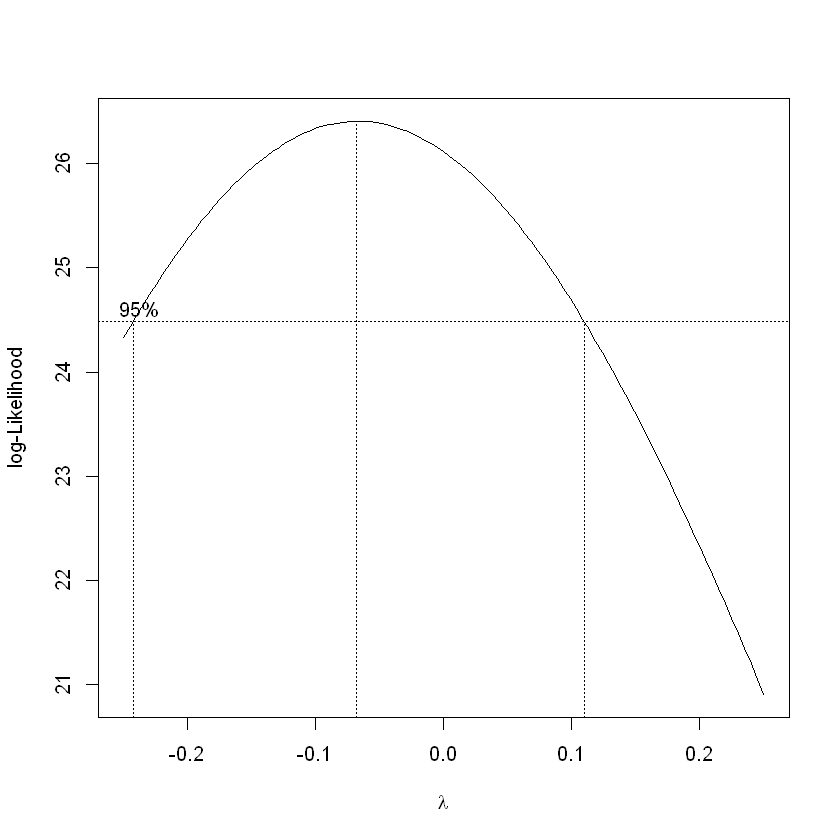

In [6]:
library(MASS)

boxcox (Volume ~ log(Height)+log(Girth), data = trees, lambda =seq(-0.25,0.25, length=10))

## Variable selection

Variable selection is intended to select the "best" subset of predictors. We want to explain the data in the simplest way. The principle is that among several plausible explanations for a phenomenon, the simplest is best. Applied to regression analysis, this implies that the smallest model that fits the data is best.

Considering the linear regression model with $p$ predictors $\left\{X_{1}, \ldots, X_{p}\right\}$

$$
Y=\beta_{0}+\beta_{1} X_{1}+\cdots+\beta_{p} X_{p}+\epsilon
$$

We want to select the smallest subset of predictors $\left\{X_{1}, \ldots, X_{p}\right\}$ that can fit the data, i.e., we are interested in testing

$$
H_{0}: \beta_{j}=0 \text { vs } H_{1}: \beta_{j} \neq 0
$$

With the normality assumption, we may use t-test to test whether $\beta_{j}=0$. In general, to select a subset of predictors, we need to test if a subset $\beta_{s}$ of $\beta$ are 0 , i.e.,

$$
H_{0}: \beta_{s}=0 \text { vs } H_{1}: \beta_{s} \neq 0
$$

The model under $H_{0}$ is called reduced model with $p_{s}+1$ coefficients $\beta$ and the model under $H_{1}$ is called full model with $(p+1)$ coefficients $\beta$. Note that $p_{s}<p$, and the null model is nested in the alternative model.

### 1. F-test 

The residual sum-of-squares $\operatorname{RSS}(\beta)$ is defined as:

$$
R S S(\beta)=\sum_{i=1}^{n}\left(y_{i}-\widehat{y}_{l}\right)^{2}=\sum_{i=1}^{n}\left(y_{i}-x_{i} \beta\right)^{2}
$$

Let $\mathrm{RSS}_{1}$ correspond to the full model with $p+1$ parameters, and $\mathrm{RSS}_{0}$ correspond to the nested model with $p_{0}+1$ parameters. The $\mathrm{F}$ statistic measures the reduction of RSS per additional parameter in the full model,

$$
F=\frac{\left(R S S_{0}-R S S_{1}\right) /\left(p_{1}-p_{0}\right)}{R S S_{1} /\left(n-p_{1}-1\right)}
$$

Under the normal assumption, the null distribution of $\mathrm{F}$ test statistic is the $\mathrm{F}$ distribution with degrees of freedom $\left(p_{1}-p_{0}\right)$ and $\left(n-p_{1}-1\right)$. Thus, we reject $\mathrm{H}_{0}$ if $F>$ a, where $\mathrm{a}$ is the $(1-\alpha)$ quantile of the $\mathrm{F}$ distribution with degrees of freedom $\left(p_{1}-p_{0}\right)$ and $\left(n-p_{1}-1\right)$.

### 2. Likelihood ratio test (LRT)

Let $\mathrm{L}_{1}$ be the maximum value of the likelihood of the full model. Let $\mathrm{L}_{0}$ be the maximum value of the likelihood of the nested model. The likelihood ratio test statistic is

$$
t=2 \log \left(L_{1}\right)-2 \log \left(L_{0}\right)
$$

The null distribution of test statistic $t$ is asymptotically $\chi^{2}$ distribution with $\left(p_{1}-p_{0}\right)$ degrees of freedom where $p_1$ is the number of parameters in the alternative model and $p_0$ is the number of parameters in the null model. Thus, we reject $\mathrm{H}_{0}$ if $t>\mathrm{a}$, where $a$ is the $(1-\alpha)$ quantile of the $\chi^{2}$ distribution with $\left(p_{1}-p_{0}\right)$ degrees of freedom.

### 3. Akaike Information Criterion (AIC)

The LRT can only be applied to the nested models. In addition, the LRT tends to favor the complex model, because LRT is solely based on the likelihood score and the complex model always has a higher likelihood score. AIC is a more general measure of "model fit" by penalizing the complexity of the model to avoid overfitting the data,

$$
\text { AIC }=-2 \text { loglikelihood }+2 p
$$

where $p$ is the number of parameters, measuring the complexity of the model, and loglikelihood measures the goodness of fit of the model to the data. Given a collection of putative models, the best model is the one with the lowest $A I C$.

### 4. Bayes Information Criterion (BIC)

AIC tends to overfit models when the sample size is small. Another information criterion which penalizes complex models more severely is 

$$
\text { BIC }=-2 \text { loglikelihood }+p * \log (n)
$$

Given a collection of putative models, the best model is the one with the lowest BIC.

### 5. Algorithms for variable selection

An exhaustive search for the subset may not be feasible if $p$ is very large. There are two main alternatives:

#### Forward stepwise selection
The algorithm begins with a naive model $y = \beta_0$ that does not include any explanatary variables $x$. Then, we add one explanatary variable at a time. We always choose from the rest of the variables the one that yields the best accuracy in prediction when added to the pool of already selected variables. This accuracy can be measured by the F statistic, LRT, AIC, BIC, etc. The algorithm stops when no predictors can be added.

#### Backward stepwise selection
The algorithm begins with the full model including all predictors and then removes one predictor at a time.

#### Forward and backward stepwise selection
mixing forward and backward selection to find the optimal subset of predictors.

#### Least absolute shrinkage and selection operator (LASSO)
The algorithm minimizes the residual sum-of-square $\operatorname{RSS}(\beta)=\sum_{i=1}^{n}\left(y_{i}-\widehat{y}_{l}\right)^{2}$, subject to $\sum_{i=1}^{p}\left|\beta_{i}\right| \leq c$, in which $\mathrm{c}$ is a pre-specified parameter. This procedure can automatically shrink some $\beta$ to 0 .

## Generalized linear regression

In linear regression model, the dependent variable $\mathrm{Y}$ is assumed to have a normal distribution with mean $X \beta$. In generalized linear regression, the normality assumption is relaxed to allow $Y$ to have other probability distributions (binomial, Poisson, etc).

### 1. Logistic model

$Y_{i}=(0,1)$ is a Bernoulli random variable with probability $p_{i}$ satisfying $\log \left(\frac{p_{i}}{1-p_{i}}\right)=X_{i} \beta$, which is called the link function. It indicates that $p_{i}=\frac{e^{X_{i} \beta}}{1+e^{X_{i} \beta}}$.

In [7]:
data <- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
head(data)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


Since $Y_{i}$ 's are independent, the likelihood function is given by

$$
\prod_{i=1}^{n} p_{i}^{Y_{i}}\left(1-p_{i}\right)^{1-Y_{i}}=\prod_{i=1}^{n}\left(\frac{e^{X_{i} \beta}}{1+e^{X_{i} \beta}}\right)^{Y_{i}}\left(\frac{1}{1+e^{X_{i} \beta}}\right)^{1-Y_{i}}
$$

The MLE of $\beta$ is given by maximizing this likelihood function with respect to $\beta$.

In [8]:
result <- glm(admit ~ gre + gpa + rank, data = data, family = "binomial")
summary(result)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5802  -0.8848  -0.6382   1.1575   2.1732  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.449548   1.132846  -3.045  0.00233 ** 
gre          0.002294   0.001092   2.101  0.03564 *  
gpa          0.777014   0.327484   2.373  0.01766 *  
rank        -0.560031   0.127137  -4.405 1.06e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 459.44  on 396  degrees of freedom
AIC: 467.44

Number of Fisher Scoring iterations: 4


We can predict the admission probability for a new observation $X$ using the equation $p=\frac{e^{X \beta}}{1+e^{X \beta}}$

In [9]:
newdata1 <- data.frame(gre = 590, gpa = 3.9, rank = 1)
predict(result, newdata = newdata1, type = "response")

1 
0.5924757

### 2. Loglinear model (counts)

$Y_{i}$ is a Poisson random variable with $\log \left(E\left(Y_{i}\right)\right)=X_{i} \beta$. It indicates that $Y_{\mathrm{i}}$ is a Poisson random variable with mean $\lambda_{i}=e^{X_{i} \beta}$. Thus, the likelihood function is given by

$$
\prod_{i=1}^{n} \frac{e^{-\lambda_{i}} \lambda_{i}^{Y_{i}}}{Y_{i} !}=\prod_{i=1}^{n} \frac{e^{-e^{X_{i} \beta}}\left(e^{X_{i} \beta}\right)^{Y_{i}}}{Y_{i} !}
$$

The MLE of $\beta$ are obtained by maximizing the likelihood function.

We may use LRT to test $\mathrm{H}_{0}: \beta_{1}=0$ vs $\mathrm{H}_{1}: \beta_{1} \neq 0$ for the logistic and loglinear models. The procedures of variable selection can also apply to the logistic and loglinear models.